# DHIMAS PRAKASA HENJO
# 2009106015
# POSTTEST 8 KB

## Import Library

In [2]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,optimizers,datasets
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [3]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [5]:
model = tf.keras.Sequential([
tf.keras.layers.Dense(units=84, input_shape=[10,10,1]),
tf.keras.layers.Dense(52, activation='relu'),
tf.keras.layers.Dense(52, kernel_initializer=tf.keras.initializers.he_normal),
tf.keras.layers.Dense(52, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
tf.keras.layers.Dense(30, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10, 10, 84)        168       
                                                                 
 dense_9 (Dense)             (None, 10, 10, 52)        4420      
                                                                 
 dense_10 (Dense)            (None, 10, 10, 52)        2756      
                                                                 
 dense_11 (Dense)            (None, 10, 10, 52)        2756      
                                                                 
 dense_12 (Dense)            (None, 10, 10, 30)        1590      
                                                                 
Total params: 11,690
Trainable params: 11,690
Non-trainable params: 0
_________________________________________________________________


In [6]:
import numpy as np

#membuat variable x sebagai atribute dan y sebagai label
x = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], dtype=float)
y = np.array([2.0, 4.0, 6.0, 8.0, 10.0, 12.0], dtype=float)

#membuat sequential dimana hanya 1 dense layer yang dibutuhkan
model = tf.keras.Sequential([
tf.keras.layers.Dense(units=1, input_shape=[1])
])

#model di kompilasi dengan optimizer sgd dan loss MSE
model.compile(optimizer='sgd', loss='mse')

#model di training dengan epoch yang dapat kita atur
model.fit(x, y, epochs=50)

#mencoba prediksi y dengan model yang telah dilatih
y_pred = model.predict([6.0, 7.0, 8.0])
print(y_pred)

Epoch 1/50
1/1 [==============================] - 0s 309ms/step - loss: 170.9552
Epoch 2/50
1/1 [==============================] - 0s 6ms/step - loss: 79.1796
Epoch 3/50
1/1 [==============================] - 0s 4ms/step - loss: 36.7026
Epoch 4/50
1/1 [==============================] - 0s 5ms/step - loss: 17.0427
Epoch 5/50
1/1 [==============================] - 0s 5ms/step - loss: 7.9430
Epoch 6/50
1/1 [==============================] - 0s 5ms/step - loss: 3.7310
Epoch 7/50
1/1 [==============================] - 0s 4ms/step - loss: 1.7812
Epoch 8/50
1/1 [==============================] - 0s 6ms/step - loss: 0.8784
Epoch 9/50
1/1 [==============================] - 0s 6ms/step - loss: 0.4601
Epoch 10/50
1/1 [==============================] - 0s 9ms/step - loss: 0.2661
Epoch 11/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1760
Epoch 12/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1339
Epoch 13/50
1/1 [==============================] - 0s 6ms/step - l

## Prediksi Data Yang Baru

In [7]:
new_data = np.array([6.0,7.0,8.0])
y_pred = model.predict(new_data)
print(y_pred)

1/1 [==============================] - 0s 21ms/step
[[11.751327]
 [13.606648]
 [15.46197 ]]


## Klasifikasi dengan Mnist Datasets

In [9]:
# Load Dataset

(x_train_raw,y_train_raw), (x_test_raw,y_test_raw) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 6s 0us/step


## Melakukan Encoding pada Label

In [11]:
num_class = 10 

#One Hot Encoding
y_train = keras.utils.to_categorical(y_train_raw,num_class)
y_test = keras.utils.to_categorical(y_test_raw,num_class)

print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## Menampilkan Gambar dari mnist dataset

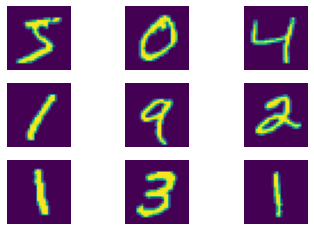

In [12]:
plt.figure
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train_raw[i])
  plt.axis('off')

plt.show()

## Reshape Gambar

In [14]:
x_train = x_train_raw.reshape(60000,784)
x_test = x_test_raw.reshape(10000,784)

## Normalisasi 

In [15]:
x_train = x_train.astype('float64')/255

## Buat Model Mnist Datasets

In [16]:
model_mnist = keras.Sequential()

In [17]:
# Input Layer
model_mnist.add(layers.Dense(512,activation='relu',input_dim=784))

# Hidden Layer
model_mnist.add(layers.Dense(256,activation='relu'))
model_mnist.add(layers.Dense(128,activation='relu'))

#Output Layer
model_mnist.add(layers.Dense(10,activation='softmax'))

In [18]:
model_mnist.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dense_15 (Dense)            (None, 256)               131328    
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


## Compile Model

In [20]:
Optimizer = optimizers.Adam(learning_rate=0.0001)
model_mnist.compile(loss=keras.losses.categorical_crossentropy,optimizer=Optimizer,
                    metrics=['accuracy'])

## Training Model

In [22]:
model_mnist.fit(x_train,y_train, epochs=15, batch_size=128)

Epoch 1/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0331 - accuracy: 0.9911
Epoch 2/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0285 - accuracy: 0.9926
Epoch 3/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0250 - accuracy: 0.9937
Epoch 4/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0207 - accuracy: 0.9952
Epoch 5/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0175 - accuracy: 0.9960
Epoch 6/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0147 - accuracy: 0.9969
Epoch 7/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0123 - accuracy: 0.9974
Epoch 8/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0107 - accuracy: 0.9978
Epoch 9/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0087 - accuracy: 0.9986
Epoch 10/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0071 - accuracy: 0.9988

## Evaluate Model

In [23]:
score = model_mnist.evaluate(x_test,y_test, verbose=1)
print(f'Test Loss : {score[0]}')
print(f'Test Akurasi : {round(score[1] * 100,2)}%')

313/313 [==============================] - 1s 2ms/step - loss: 17.1542 - accuracy: 0.9797
Test Loss : 17.154159545898438
Test Akurasi : 97.97%
